# Wrangling Twitter Data
In this project we gather, assess, clean and analyze data from a Twitter user, We Rate Dogs. The data is gathered in three different formats via three different sources: direct download of an archive file in csv format, programmatic download of a tsv file, and a query of Twitters API. The data is assessed visually and programmatically for quality and tidiness, and cleaned with specific uses and analysis in mind. Finally the data is stored into a master dataset and analyzed.  

### Table of Contents  
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Creating a Master Dataset](#master)
- [Insights](#insights)


<a id='gather'></a>
# Gather

### We'll read in csv file to create dataframe. The file contains tweet data.

In [644]:
import pandas as pd
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Here we'll programmatically download a tsv file to our working directory and read it in to create dataframe. The file contains the output of a neural network used to predict the breed of dog photographed in each tweet

In [645]:
import requests
import os
folder_name = os.getcwd()
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [646]:
breeds = pd.read_csv('image-predictions.tsv', sep='\t')

In [647]:
breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Below is the code used to query Twitter's API to pull down retweet and favorite counts for tweet ID's contained in our twitter archive.   

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Next we'll use a loop to read in our txt file, line by line, using json.loads. Selected object data will be stored in dictionaries, appended to a list and then the list will then be converted to a dataframe

In [648]:
import json

In [649]:
#create a list which will house contents of dictionaries
tweetlist = []
#open json format .txt file using .open() method, stored as variable 'file'
with open('tweet-json.txt') as file:
#create a loop using .readlines() and json.loads() methods - this loop will convert .txt file line by line to json object
    for line in file.readlines():
#variable 'data' will contain line
        data = json.loads(line)
#variables 'tweet_id','retweet_count' and 'favorite_count' will store object values from keys indicated
        tweet_id = data['id_str']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
#create dictionary which will store objects returned from each iteration of the loop , and later appended to list
        tweetdic = {'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                   'favorite_count': favorite_count}
#with each iteration, append tweetdic to tweetlist
        tweetlist.append(tweetdic)
#convert list to dataframe
json_df = pd.DataFrame(tweetlist)

In [650]:
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
# Assess

In [651]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [652]:
tweets.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [653]:
tweets.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Mojo         1
Monster      1
Jonah        1
Brudge       1
Geno         1
Name: name, Length: 957, dtype: int64

In [654]:
#exporting to CSV to identify issues with how numerators, denominators and names were extracted
tweets[['text','rating_numerator','rating_denominator','name']].to_csv('test.csv')

In [655]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [656]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [657]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [658]:
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [659]:
breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [660]:
breeds.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [661]:
breeds.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
pitcher                  1
banana                   1
studio_couch             1
African_hunting_dog      1
espresso                 1
Name: p1, Length: 378, dtype: int64

In [662]:
breeds.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [663]:
breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [664]:
breeds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [665]:
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [666]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [667]:
json_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Assessments

### Quality:

- Tweet ID's to string 
- '+0000' at end of tweet timestamp
- Timestamp to datetime  
- Drop rows that represent re-tweets
- Drop In_reply/retweeted columns
- Dog name incorrectly extracted 
- Rating numerators incorrectly extracted  
- Rating denominators incorrecty extracted
- Rating numerators to type int
- Rating denominators to type int
- p2/p3 predictions won't be used - remove related columns
- non-breed predictions 
- uppercase breed names

### Tidiness:  

- isolate limited stage data into its own table for seperate analysis and merging
- dog stage - melt columns

<a id='clean'></a>
# Clean  
## Tidiness

#### First, we'll make copies of our dataframes

In [668]:
tweets_clean = tweets.copy()
stages_clean = tweets.copy()
breeds_clean = breeds.copy()
json_df_clean = json_df.copy()

#### Dog stage data is very limited - I'll isolate this data into its own table

##### Define  
Create two dataframes: 'tweets_clean' drops columns related to dog stage, and 'stages_clean' retains only 'tweet_id' and columns related to dog stage

##### Code

In [669]:
tweets_clean = tweets_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)
stages_clean = stages_clean[['tweet_id','doggo','floofer','pupper','puppo']]

##### Test

In [670]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
dtypes: float64(4), int64(3), object(6

In [671]:
stages_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2356 non-null   int64 
 1   doggo     2356 non-null   object
 2   floofer   2356 non-null   object
 3   pupper    2356 non-null   object
 4   puppo     2356 non-null   object
dtypes: int64(1), object(4)
memory usage: 92.2+ KB


#### Dog stage is a variable - doggo, floofer, pupper and puppo are values that belong in a column 

##### Define  
Melt dog stage columns into single column and remove rows with value 'None'. Drop 'variable' column.

##### Code

In [672]:
stages_clean = pd.melt(stages_clean, id_vars = ['tweet_id'], var_name= 'variable', value_name = 'stage')

In [673]:
stages_clean = stages_clean[stages_clean.stage != 'None']
stages_clean.drop(['variable'], axis=1, inplace=True)

##### Test

In [674]:
stages_clean.stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: stage, dtype: int64

In [675]:
stages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 9 to 8151
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  394 non-null    int64 
 1   stage     394 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.2+ KB


#### *The melt operation creates a small number of duplicates caused by rows with values in more than one column prior to melt. In these cases we'll retain the first row/first dog stage value and remove the duplicate*

In [676]:
stages_clean[stages_clean['tweet_id'].duplicated() == True]

,tweet_id,stage
2556,854010172552949760,floofer
5172,817777686764523521,pupper
5243,808106460588765185,pupper
5277,802265048156610565,pupper
5287,801115127852503040,pupper
5417,785639753186217984,pupper
5445,781308096455073793,pupper
5490,775898661951791106,pupper
5534,770093767776997377,pupper
5601,759793422261743616,pupper


In [677]:
stages_clean.drop_duplicates(subset='tweet_id', inplace=True)

In [678]:
stages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 9 to 8151
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  380 non-null    int64 
 1   stage     380 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


## Quality

#### Tweet id's in each table should be converted to object as they'll be used as join keys and not for calculation

##### Define
Convert tweet_id to object datatype on tweets_clean, breeds_clean, and stages_clean

##### Code

In [679]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

In [680]:
breeds_clean.tweet_id = breeds_clean.tweet_id.astype(str)

In [681]:
stages_clean.tweet_id = stages_clean.tweet_id.astype(str)

##### Test

In [682]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
dtypes: float64(4), int64(2), object(7

In [683]:
breeds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [684]:
stages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 9 to 8151
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  380 non-null    object
 1   stage     380 non-null    object
dtypes: object(2)
memory usage: 8.9+ KB


#### Characters at the end of timestamps, ' +0000', are not needed for conversion to datetime

##### Define  
Use string slicing to remove characters

##### Code

In [685]:
tweets_clean['timestamp'] = tweets_clean['timestamp'].str[:-5]

##### Test

In [686]:
tweets_clean['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

#### Timestamps should be converted to datetime to enable datetime features

##### Define  
Convert timestamp to datetime

##### Code

In [687]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'], yearfirst = True)

##### Test

In [688]:
tweets_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### We don't need replies or retweets. These tweets should be removed.

##### Define  
Re-define dataframe using query to include only rows with no reply or retweet status id

##### Code

In [689]:
tweets_clean = tweets_clean.query('in_reply_to_status_id == "NaN" and retweeted_status_id == "NaN"')

##### Test

In [690]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

#### As we've removed replies and retweets, we no longer need related columns

##### Define  
Drop columns related to replies or retweets

##### Code

In [691]:
tweets_clean = tweets_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test

In [692]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.4+ KB


#### Many names were extracted incorrectly; articles were being captured like 'a', 'an', and 'the'. 

##### Define
Use str.extract with regex statement to improve name extraction  
*the regex statement used below does not successfully extract all names present in the text strings but errors are nearly non-existent*

##### Code

In [693]:
tweets_clean['name'] = tweets_clean['text'].str.extract('((^This is |named |name is |^Meet |^Say hello to )(\w{2,}\.))')[2].str[:-1]

##### Test

In [694]:
tweets_clean['name'].value_counts()

Charlie      11
Cooper       10
Lucy         10
Tucker        9
Oliver        9
             ..
Glacier       1
Scruffers     1
Claude        1
Marvin        1
Jay           1
Name: name, Length: 898, dtype: int64

#### Rating numerators were extracted in error in cases where numeric characters coupled with '/' existed in the string prior to the actual rating ie '7/11', '9/11' or '4/20'

##### Define
Use str.extract with regex statement to correct numerator extraction  

##### Code

In [695]:
tweets_clean['rating_numerator'] = tweets_clean['text'].str.extract('((.+?\d+?\/?\d+?)?.+?(\d+)\/\d+)')[2]

##### Test

In [696]:
tweets_clean['rating_numerator'].value_counts()

12     480
10     419
11     411
13     287
9      150
8      101
7       54
14      39
6       33
5       32
3       21
4       16
2       15
0       12
1        8
26       1
80       1
84       1
88       1
99       1
44       1
144      1
45       1
204      1
165      1
27       1
121      1
420      1
75       1
60       1
24       1
Name: rating_numerator, dtype: int64

#### Rating denominators were extracted in error in cases where numeric characters coupled with '/' existed in the string prior to the actual rating ie '7/11', '9/11' or '4/20'

##### Define
Use str.extract with regex statement to correct denominator extraction  

##### Code

In [697]:
tweets_clean['rating_denominator'] = tweets_clean['text'].str.extract('((.+?\d+?\/?\d+?)?.+?\d+\/(\d+))')[2]

##### Test

In [698]:
#export to CSV and open in external program to visually assess and confirm that numerator and denominator extractions were successful
tweets_clean[['text','rating_numerator','rating_denominator']].to_csv('num_denom_test.csv')

#### Numerators and denominators should be converted to datatype int to allow arithmetic operations

##### Define  
Convert numerators and denominators to type int

##### Code

In [699]:
#filling NaN values to allow dtype conversion
tweets_clean['rating_numerator'].fillna(value=0, inplace=True)

In [700]:
tweets_clean['rating_numerator'] = tweets_clean['rating_numerator'].astype(int)

In [701]:
#filling NaN values to allow dtype conversion
tweets_clean['rating_denominator'].fillna(value=0, inplace=True)

In [702]:
tweets_clean['rating_denominator'] = tweets_clean['rating_denominator'].astype(int)

In [703]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int32         
 6   rating_denominator  2097 non-null   int32         
 7   name                1324 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(5)
memory usage: 131.1+ KB


#### We won't be using 2nd or 3rd predictions from the breeds table

 ##### Define  
 Drop columns related to 2nd and 3rd predictions

##### Code

In [704]:
breeds_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

##### Test

In [705]:
breeds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


#### We only want to work with dog breed predictions - remove non-dog predictions

##### Define
Re-define breeds_clean using query to include only rows with p1_dog value of True

##### Code

In [706]:
breeds_clean = breeds_clean.query('p1_dog == True')

##### Test

In [707]:
breeds_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### Inconsistency in breed names

##### Define  
Inconsistent breed names - lowercase and uppercase. Change all to lowercase.

##### Code

In [708]:
breeds_clean['p1'] = breeds_clean['p1'].str.lower()

In [709]:
breeds_clean['p1'].value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
clumber                 1
japanese_spaniel        1
standard_schnauzer      1
entlebucher             1
scotch_terrier          1
Name: p1, Length: 111, dtype: int64

<a id='master'></a>
# Creating a Master Dataset  
Here we'll merge our tables into one master dataset.  
*Given the analysis planned and the scarcity of some data, I decided to allow NaN values to remain in the Master dataset.*

In [710]:
master_df = tweets_clean.merge(breeds_clean, on=['tweet_id'],how='left').merge(stages_clean, on=['tweet_id'],how='left').merge(json_df_clean, on=['tweet_id'],how='left')

In [711]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,NaN,9774,41048


In [712]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int32         
 6   rating_denominator  2097 non-null   int32         
 7   name                1324 non-null   object        
 8   jpg_url             1463 non-null   object        
 9   img_num             1463 non-null   float64       
 10  p1                  1463 non-null   object        
 11  p1_conf             1463 non-null   float64       
 12  p1_dog              1463 non-null   object        
 13  stage               336 non-null    object      

In [713]:
master_df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,2097.000000,2097.000000,1463.000000,1463.000000,2097.000000,2097.000000
mean,11.212685,10.413448,1.212577,0.615043,2841.667620,8980.902241
std,12.039240,6.594532,0.573520,0.260249,4709.238203,12199.636684
min,0.000000,0.000000,1.000000,0.044333,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.392933,644.000000,2046.000000
50%,11.000000,10.000000,1.000000,0.615741,1405.000000,4196.000000
75%,12.000000,10.000000,1.000000,0.853345,3285.000000,11416.000000
max,420.000000,170.000000,4.000000,0.999956,79515.000000,132810.000000


<a id='insights'></a>
# Insights

## How Many Tweets Per Day?  
Let's observe this users activity

In [714]:
#group by day and count
day = master_df.groupby([master_df['timestamp'].dt.date]).count()

In [715]:
#Avg tweets per day
day.tweet_id.mean()

3.5066889632107023

In [716]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

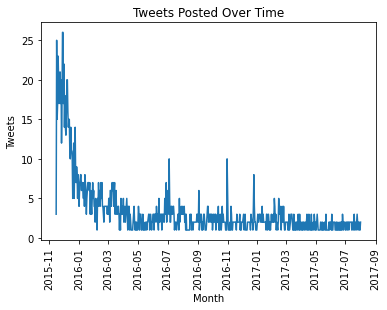

In [717]:
#Tweet activity over time
plt.plot(day.tweet_id)
plt.title('Tweets Posted Over Time')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.xticks(rotation='vertical');

## What is the proportion of breeds in the dataset?
Here we create a new dataframe which includes only those observations with a breed prediction confidence level over 85%. This way we can be much more confident in the accuracy of our analysis.

In [718]:
master_85 = master_df.query('p1_conf > .85')
master_85.p1.value_counts(normalize=True)

golden_retriever       0.145946
pembroke               0.083784
pug                    0.075676
labrador_retriever     0.070270
samoyed                0.059459
                         ...   
bloodhound             0.002703
briard                 0.002703
border_collie          0.002703
collie                 0.002703
miniature_schnauzer    0.002703
Name: p1, Length: 71, dtype: float64

## How many unique breeds in the dataset?

In [719]:
master_85.p1.nunique()

71

## What are the highest rated breeds?
Let's see what breed of dogs this twitter user likes best, by observing which breed receives the highest avg rating

In [720]:
#A query to include only those rows with a standard denominator of 10
#We also group by breed and find our average rating numerator
top_breed = master_85.query('rating_denominator == "10"').groupby('p1').mean()

In [721]:
#We sort by rating numerator and our top ten breeds are displayed
top_breed.sort_values(by='rating_numerator', ascending = False).head(10)

,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
p1,,,,,,
clumber,27.00,10.0,1.000000,0.946718,1885.000000,7320.000000
gordon_setter,14.00,10.0,2.000000,0.940724,648.000000,3706.000000
black-and-tan_coonhound,14.00,10.0,4.000000,0.854861,8285.000000,33911.000000
afghan_hound,13.00,10.0,1.000000,0.903712,5312.000000,17305.000000
leonberg,13.00,10.0,3.000000,0.927021,7422.000000,29684.000000
briard,13.00,10.0,4.000000,0.982755,1264.000000,7117.000000
norwegian_elkhound,12.50,10.0,2.500000,0.926692,4536.000000,16437.500000
great_pyrenees,12.25,10.0,2.750000,0.894917,9453.750000,26034.500000
pembroke,12.00,10.0,1.516129,0.949168,4223.580645,14378.064516


## What are the most popular breeds?

In [722]:
#Here we group by breed and perform a sum
popular_breed = master_85.groupby('p1').sum()

In [723]:
#We sort by favorite count and our top 10 most popular breeds are displayed
popular_breed.sort_values(by='favorite_count', ascending = False).head(10)

,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
p1,,,,,,
golden_retriever,645,537,73.0,49.982161,195966,686368
pembroke,372,310,47.0,29.424196,130931,445720
labrador_retriever,408,360,32.0,24.122411,130234,444006
samoyed,262,220,27.0,21.327824,108274,308347
french_bulldog,145,130,16.0,12.393773,74449,279738
pug,289,280,34.0,26.897703,56068,173715
pomeranian,192,180,28.0,17.285238,47170,117397
chihuahua,159,150,21.0,15.132780,35217,115892
great_pyrenees,49,40,11.0,3.579667,37815,104138


## What is the proportion of dog stages?

In [724]:
stages_clean.stage.value_counts(normalize=True)

pupper     0.644737
doggo      0.255263
puppo      0.076316
floofer    0.023684
Name: stage, dtype: float64

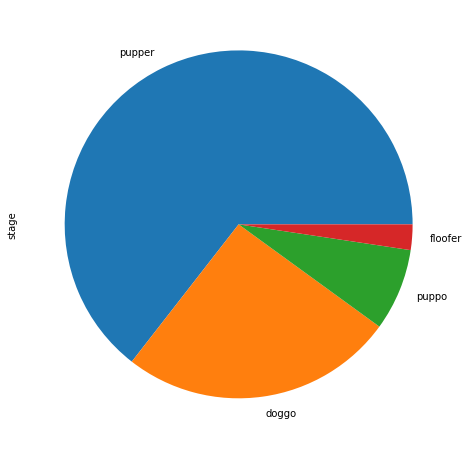

In [725]:
stages_clean.stage.value_counts().plot(kind='pie',figsize=(8,8));